Task:
- Implement a uniform distribution number generator. To test the hypothesis about the uniformity of the distribution.
- On the basis of a uniform distribution, make a normal distribution. To test the hypothesis of the normality of the distribution.
- To make a sample from the values of Kolmogorov statistics for 100 simulated normal distributions.

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

- m, module; 0 < m; 
- а, multiplier; 0 < а < m; 
- с, increment; 0 < с < m;  
- X(0), initial value; 0 =< X(0) < m. 

The desired sequence of random numbers: 
X(n+i) = (а*Х(n) + с) mod m, n >= 0.  

In [2]:
def generate(m, a, c, x_start, number):
    gen_list = [x_start]
    x_prev = x_start
    for elt in range(number-1):
        x_prev = (a*x_prev+c)%m
        gen_list.append(x_prev)
    return gen_list

### Example with bad params in function "geterate"

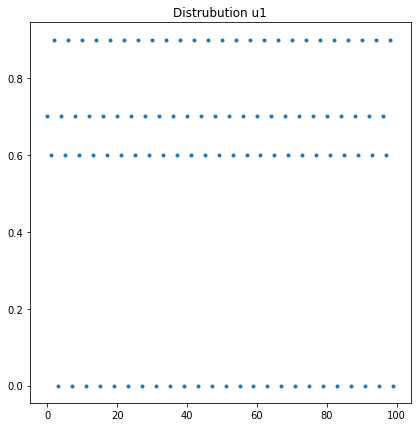

In [3]:
N = 100
n = range(N)
l1 = np.array(generate(10, 7, 7, 7, 100))/10
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
plt.plot(n, l1, '.')
plt.title('Distrubution u1');

### Example with suitable params in function "geterate"

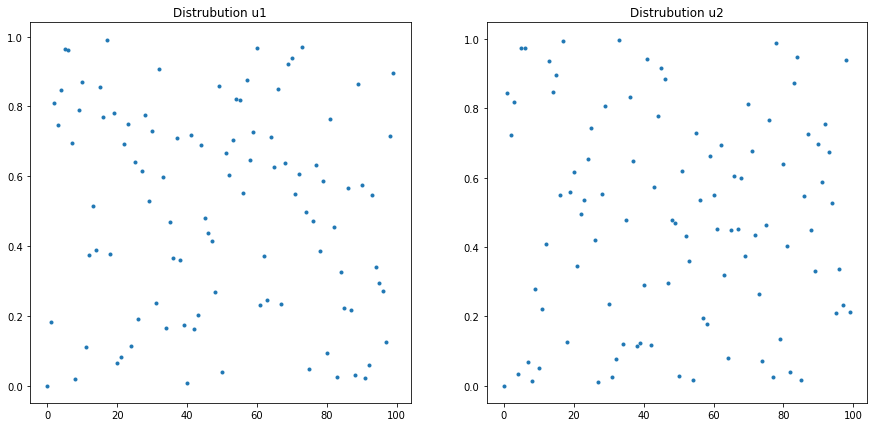

In [4]:
N = 100
n = range(N)
random.seed(17)
u1 = np.array(generate(16807, 0x7fffffff, 0, 7, N))/16807
u2 = np.array(generate(16807, 0x7fffffff, 0, 5, N))/16807

plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
plt.plot(n, u1, '.')
plt.title('Distrubution u1')
plt.subplot(1,2,2)
plt.plot(n, u2, '.')
plt.title('Distrubution u2')
plt.show()

In [5]:
stats.kstest(u1, "uniform") 

KstestResult(statistic=0.06560599750104124, pvalue=0.7574460367157285)

In [6]:
stats.kstest(u2, "uniform") 

KstestResult(statistic=0.0768411971202475, pvalue=0.5696779015482883)

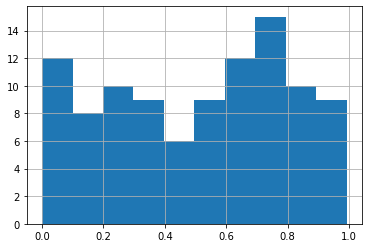

In [7]:
u11 = pd.Series(u1)
u11.hist();

### Modeling of the normal distribution using a uniform distribution

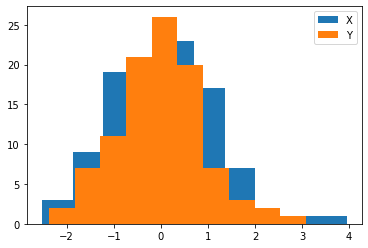

In [ ]:
X_norm = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
Y_norm = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
plt.hist(X_norm, label = 'X');
plt.hist(Y_norm, label = 'Y');
plt.legend();

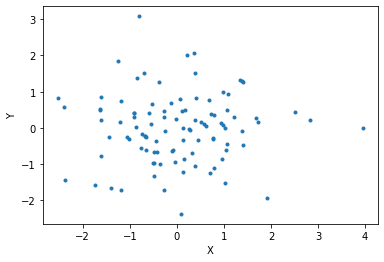

In [ ]:
plt.plot(X_norm, Y_norm, '.')
plt.xlabel('X');
plt.ylabel('Y');

In [ ]:
stats.kstest(X_norm, "norm") 

KstestResult(statistic=0.05511366112990257, pvalue=0.9216707027895396)

### Making a new sample of 100 values of the Kolmogorov normality test

In [10]:
import statistics
from scipy.stats import norm
N = 100
n = range(N)
statistics_list = []
for i in range(1,N*2+1,2):
  u1 = np.array(generate(16807, 0x7fffffff, 0, i, N))/16807

  u2 = np.array(generate(16807, 0x7fffffff, 0, i+1, N))/16807
  X_norm = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
  st, p = stats.kstest(X_norm, 'norm')
  statistics_list.append(st)

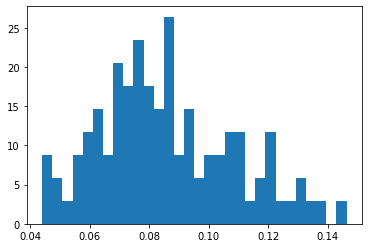

In [18]:
plt.hist(statistics_list, bins = 30, density = True);

**This sample has a Kolmogorov distribution**

#Chi square test implementation and checking the distribution

In [12]:
from scipy.stats import kstwobign
import statistics

K = len(statistics_list)

m=statistics.mean(statistics_list)
std_1=statistics.stdev(statistics_list)
pmax=max(statistics_list);
pmin=min(statistics_list);
dis=(pmax-pmin)/4;
num=[0]*5

i=0;
while i<5:
  for j in range(i, K):
    if (statistics_list[j]>=pmin) and (statistics_list[j]<pmin+dis):
      num[i]=num[i]+1
  pmin=pmin+dis
  i=i+1

pmin=min(statistics_list);

F = [0]*5
F[0]=kstwobign.cdf(pmin,m,std_1)
F[1]=kstwobign.cdf(pmin+dis,m,std_1)
F[2]=kstwobign.cdf(pmin+2*dis,m,std_1)
F[3]=kstwobign.cdf(pmin+3*dis,m,std_1)
# F[4]=kstwobign.cdf(pmin+4*dis,m,std_1)
F[4]=kstwobign.cdf(pmax,m,std_1)


p = [0]*5
p[0] = F[0]
for i in range(1,4):
  p[i]=F[i]-F[i-1]
p[4] = 1 - F[4]

k = 0
for i in range(5):
  k = k+((num[i]-K*p[i])**2)/(K*p[i])
print('The chi square value is ', k)

The chi square value is  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


Here I get a mistake

In [13]:
p

[0.0, 0.0, 0.0028753263907296107, 0.9777218085921773, 1.6912351806785964e-06]

In [14]:
sum(p)

0.9805988262180876

In [15]:
num

[25, 44, 20, 8, 1]

In [ ]:
stats.kstest(statistics_list, 'norm')

KstestResult(statistic=0.7109458139539231, pvalue=1.656218397731384e-51)